<a href="https://www.kaggle.com/code/dataranch/loan-eligibility-eda-model-comparison?scriptVersionId=106684292" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Loan Eligibility Baseline Model Comparison + Feature Importance 📊**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.

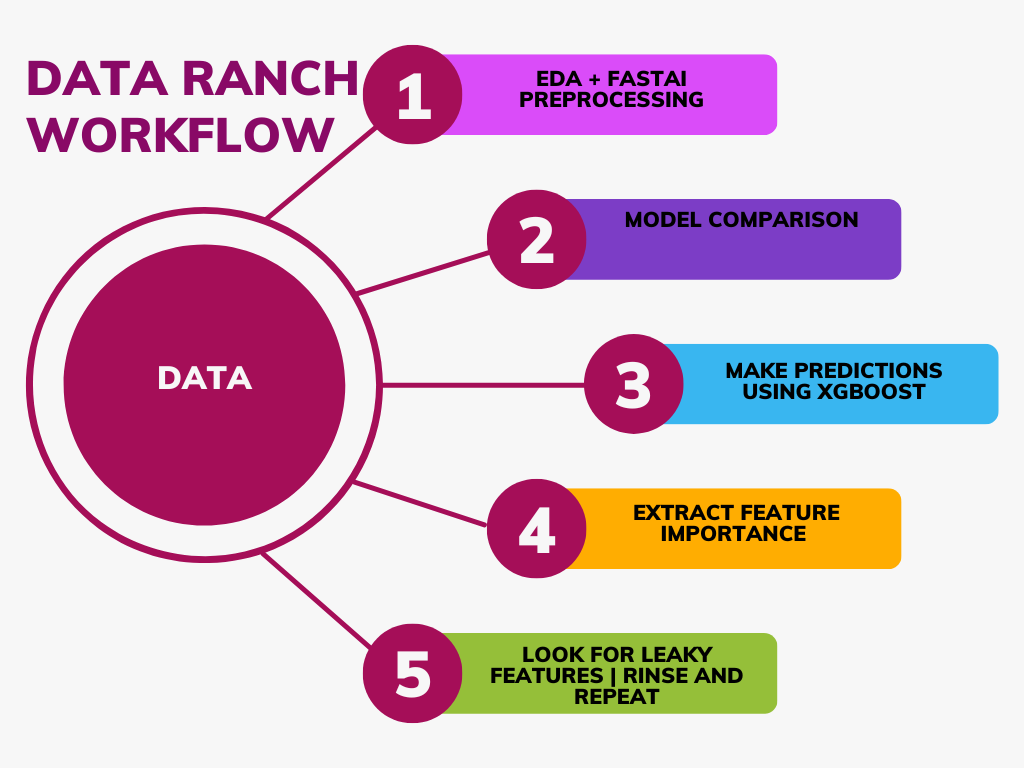

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 265.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 883.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 14.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 20.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 11.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 13.0 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x8

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 11.0 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.

In [4]:
!pip install fast-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 477.6 kB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'loan-prediction-with-3-problem-statement'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 20000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
df = pd.read_csv('../input/loan-prediction-with-3-problem-statement/training_set.csv')

param_dir: /kaggle/working/loan-prediction-with-3-problem-statement


In [9]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00,0.00,NaN,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00,0.00,141.00,360.00,1.00,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900.00,0.00,71.00,360.00,1.00,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106.00,0.00,40.00,180.00,1.00,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072.00,240.00,253.00,360.00,1.00,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583.00,0.00,187.00,360.00,1.00,Urban,Y


In [10]:
df.isna().sum()

Loan_ID               0
Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

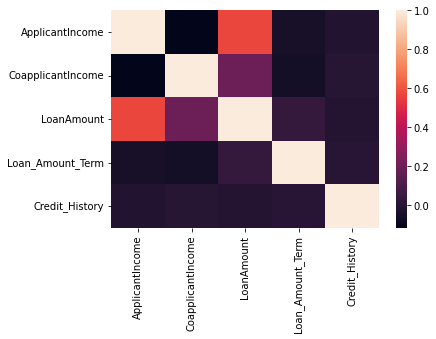

In [11]:
sns.heatmap(df.corr())

In [12]:
df.head().style.background_gradient(cmap = "inferno")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.00,0.00,nan,360.00,1.00,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,nan,1508.00,128.00,360.00,1.00,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.00,0.00,66.00,360.00,1.00,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.00,2358.00,120.00,360.00,1.00,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.00,0.00,141.00,360.00,1.00,Urban,Y


In [13]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,612.00,5405.54,6118.91,150.00,2875.75,3806.00,5803.75,81000.00
CoapplicantIncome,613.00,1620.89,2928.62,0.00,0.00,1167.00,2302.00,41667.00
LoanAmount,592.00,146.41,85.59,9.00,100.00,128.00,168.00,700.00
Loan_Amount_Term,600.00,342.00,65.12,12.00,360.00,360.00,360.00,480.00
Credit_History,564.00,0.84,0.36,0.00,1.00,1.00,1.00,1.00


In [14]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status'],
      dtype='object')

Target Variable: Credit_History
CATS=====================
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status']
CONTS=====================
['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
13
Could not convert Loan_ID to float.
Looping through continuous variables to find breakpoint
Error with  Loan_ID
Continuous variables that made the cut : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
Categorical variables that made the cut : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status']
Tabular Object size: 614


 17%|█▋        | 7/42 [00:00<00:00, 50.89it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.05448666322023765, 'Adjusted R-Squared': -0.12914058628007763, 'RMSE': 0.3801682106385168, 'Time taken': 0.016740798950195312}
{'Model': 'BaggingRegressor', 'R-Squared': -0.32778620873211173, 'Adjusted R-Squared': -0.4217887721821729, 'RMSE': 0.4265985056133008, 'Time taken': 0.02840566635131836}
{'Model': 'BayesianRidge', 'R-Squared': 0.04462704303955434, 'Adjusted R-Squared': -0.023009980462070256, 'RMSE': 0.36186095496138426, 'Time taken': 0.009423255920410156}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.6121912626974595, 'Adjusted R-Squared': -0.7263286972247134, 'RMSE': 0.47007108166272205, 'Time taken': 0.008991003036499023}
{'Model': 'DummyRegressor', 'R-Squared': -0.04431594982496945, 'Adjusted R-Squared': -0.11824982237894965, 'RMSE': 0.37833037297156236, 'Time taken': 0.008053302764892578}
{'Model': 'ElasticNet', 'R-Squared': -0.04431594982496945, 'Adjusted R-Squared': -0.11824982237894965, 'RMSE': 0.37833037297156236, 'Ti

 31%|███       | 13/42 [00:00<00:01, 24.25it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.4145268670793518, 'Adjusted R-Squared': -0.5146703620938193, 'RMSE': 0.44031233637462885, 'Time taken': 0.14210891723632812}
{'Model': 'GammaRegressor', 'R-Squared': 0.048952800647189654, 'Adjusted R-Squared': -0.018377974528230645, 'RMSE': 0.3610408047438947, 'Time taken': 0.01123046875}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -2.9805298972520053, 'Adjusted R-Squared': -3.26233732360613, 'RMSE': 0.7386278830257142, 'Time taken': 0.04690742492675781}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.05683924815142827, 'Adjusted R-Squared': -0.009933194457320216, 'RMSE': 0.3595407442088356, 'Time taken': 0.029284954071044922}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.12195031126799782, 'Adjusted R-Squared': -0.2013804218002455, 'RMSE': 0.3921408309110181, 'Time taken': 0.1117715835571289}


 40%|████      | 17/42 [00:00<00:01, 17.54it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.1022391368807758, 'Adjusted R-Squared': -0.18027376604047696, 'RMSE': 0.38868087048806954, 'Time taken': 0.22813796997070312}
{'Model': 'HuberRegressor', 'R-Squared': -0.7941176073337037, 'Adjusted R-Squared': -0.9211347830741432, 'RMSE': 0.4958846981905573, 'Time taken': 0.05854058265686035}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.29176470588235337, 'Adjusted R-Squared': -0.3832170744403962, 'RMSE': 0.42077212399096603, 'Time taken': 0.013360738754272461}
{'Model': 'KernelRidge', 'R-Squared': -24.119138429302474, 'Adjusted R-Squared': -25.897484512792918, 'RMSE': 1.8554857471706185, 'Time taken': 0.046315670013427734}
{'Model': 'Lars', 'R-Squared': 0.03469145064953971, 'Adjusted R-Squared': -0.033648977623059295, 'RMSE': 0.36373771089110885, 'Time taken': 0.029917001724243164}


 55%|█████▍    | 23/42 [00:01<00:00, 20.86it/s]

{'Model': 'LarsCV', 'R-Squared': 0.06004587446935694, 'Adjusted R-Squared': -0.006499550346971805, 'RMSE': 0.3589290274792036, 'Time taken': 0.0884714126586914}
{'Model': 'Lasso', 'R-Squared': -0.04431594982496945, 'Adjusted R-Squared': -0.11824982237894965, 'RMSE': 0.37833037297156236, 'Time taken': 0.010646820068359375}
{'Model': 'LassoCV', 'R-Squared': 0.05673088307957952, 'Adjusted R-Squared': -0.010049231392662783, 'RMSE': 0.35956139845013824, 'Time taken': 0.06526660919189453}
{'Model': 'LassoLars', 'R-Squared': -0.04431594982496945, 'Adjusted R-Squared': -0.11824982237894965, 'RMSE': 0.37833037297156236, 'Time taken': 0.01045989990234375}
{'Model': 'LassoLarsCV', 'R-Squared': 0.06004587446935694, 'Adjusted R-Squared': -0.006499550346971805, 'RMSE': 0.3589290274792036, 'Time taken': 0.023070096969604492}
{'Model': 'LassoLarsIC', 'R-Squared': 0.05153484470539382, 'Adjusted R-Squared': -0.015613130890684612, 'RMSE': 0.3605503680651548, 'Time taken': 0.013153553009033203}
{'Model': 

 69%|██████▉   | 29/42 [00:01<00:01, 11.12it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.2668019066880858, 'Adjusted R-Squared': -0.35648699742706547, 'RMSE': 0.41668666983063596, 'Time taken': 0.7298450469970703}
{'Model': 'NuSVR', 'R-Squared': -0.2600289661916362, 'Adjusted R-Squared': -0.3492345567184778, 'RMSE': 0.4155712719418324, 'Time taken': 0.09621787071228027}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.056218416134534155, 'Adjusted R-Squared': -0.010597979183375017, 'RMSE': 0.35965905791332303, 'Time taken': 0.014377117156982422}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.056218416134534155, 'Adjusted R-Squared': -0.010597979183375017, 'RMSE': 0.35965905791332303, 'Time taken': 0.014921903610229492}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.7114933095301752, 'Adjusted R-Squared': -1.9034574376385063, 'RMSE': 0.6096204421951114, 'Time taken': 0.009826898574829102}
{'Model': 'PoissonRegressor', 'R-Squared': 0.062375882539433936, 'Adjusted R-Squared': -0.004004585953349515, 'RMSE': 0.358

 81%|████████  | 34/42 [00:02<00:00, 13.24it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
{'Model': 'RandomForestRegressor', 'R-Squared': -0.29620983553489966, 'Adjusted R-Squared': -0.3879769035373706, 'RMSE': 0.42149546793227716, 'Time taken': 0.17695140838623047}
{'Model': 'Ridge', 'R-Squared': 0.03506928629918182, 'Adjusted R-Squared': -0.03324439254689393, 'RMSE': 0.3636665178382039, 'Time taken': 0.01018667221069336}
{'Model': 'RidgeCV', 'R-Squared': 0.03828492904128655, 'Adjusted R-Squared': -0.029801093681454338, 'RMSE': 0.36306005071753716, 'Time taken': 0.009253740310668945}


100%|██████████| 42/42 [00:02<00:00, 17.42it/s]


{'Model': 'SGDRegressor', 'R-Squared': 0.03562079510855387, 'Adjusted R-Squared': -0.03265383886606199, 'RMSE': 0.3635625756835928, 'Time taken': 0.010488271713256836}
{'Model': 'SVR', 'R-Squared': -0.2352526888868267, 'Adjusted R-Squared': -0.32270420668412436, 'RMSE': 0.41146524425176567, 'Time taken': 0.02747058868408203}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.03469145064953949, 'Adjusted R-Squared': -0.03364897762305952, 'RMSE': 0.3637377108911089, 'Time taken': 0.009572744369506836}
{'Model': 'TweedieRegressor', 'R-Squared': 0.05683924815142827, 'Adjusted R-Squared': -0.009933194457320216, 'RMSE': 0.3595407442088356, 'Time taken': 0.009567975997924805}
{'Model': 'XGBRegressor', 'R-Squared': -0.4504831454180285, 'Adjusted R-Squared': -0.5531722176600129, 'RMSE': 0.44587347, 'Time taken': 0.04942131042480469}
{'Model': 'LGBMRegressor', 'R-Squared': -0.1022391368807758, 'Adjusted R-Squared': -0.18027376604047696, 'RMSE': 0.38868087048806954, 'Time taken': 0.0499403476

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,3.760144,1.135139,1.065429,00:00
1,3.590816,0.993944,0.996967,00:00
2,2.908875,0.719615,0.848301,00:00
3,2.259426,0.429052,0.655020,00:00
4,1.833105,0.550665,0.742068,00:00


Better model found at epoch 0 with _rmse value: 1.0654288530349731.
Better model found at epoch 1 with _rmse value: 0.9969674348831177.
Better model found at epoch 2 with _rmse value: 0.8483014702796936.
Better model found at epoch 3 with _rmse value: 0.6550202369689941.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       1.00
1       2       1.00
2       2       1.08
3       2       2.00
4       1       1.47
XGBoost RMSE:  0.44588116


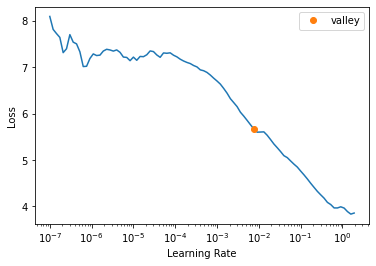

<Figure size 720x720 with 0 Axes>

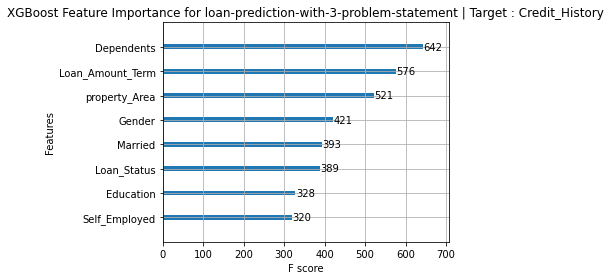

Target Variable: Loan_Amount_Term
CATS=====================
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status']
CONTS=====================
['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
13
Could not convert Loan_ID to float.
Looping through continuous variables to find breakpoint
Error with  Loan_ID
Continuous variables that made the cut : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
Categorical variables that made the cut : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status']
Tabular Object size: 614


 17%|█▋        | 7/42 [00:00<00:00, 46.18it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.5865918409106268, 'Adjusted R-Squared': -0.6989169269927953, 'RMSE': 1.9164006067629942, 'Time taken': 0.02430105209350586}
{'Model': 'BaggingRegressor', 'R-Squared': -0.31448649755633684, 'Adjusted R-Squared': -0.40754748853377687, 'RMSE': 1.7443424751290675, 'Time taken': 0.030033588409423828}
{'Model': 'BayesianRidge', 'R-Squared': -0.008248037844035494, 'Adjusted R-Squared': -0.07962842990379038, 'RMSE': 1.527697557058514, 'Time taken': 0.010226964950561523}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.6563154370804711, 'Adjusted R-Squared': -0.7735767069622745, 'RMSE': 1.9580564860293022, 'Time taken': 0.0094146728515625}
{'Model': 'DummyRegressor', 'R-Squared': -0.014624988937666172, 'Adjusted R-Squared': -0.08645684656157182, 'RMSE': 1.5325211206408387, 'Time taken': 0.008292675018310547}
{'Model': 'ElasticNet', 'R-Squared': -0.014624988937666172, 'Adjusted R-Squared': -0.08645684656157182, 'RMSE': 1.5325211206408387, 'Time ta

 29%|██▊       | 12/42 [00:00<00:01, 29.00it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.3704711725090246, 'Adjusted R-Squared': -0.4674956802972743, 'RMSE': 1.7811013948148737, 'Time taken': 0.15440154075622559}
{'Model': 'GammaRegressor', 'R-Squared': 0.02326339464487681, 'Adjusted R-Squared': -0.04588609953955669, 'RMSE': 1.5036349905867088, 'Time taken': 0.01089787483215332}
{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.3064068321313167, 'Adjusted R-Squared': -3.611285191928225, 'RMSE': 3.157266338169953, 'Time taken': 0.04100489616394043}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.02365861271535108, 'Adjusted R-Squared': -0.04546290142869491, 'RMSE': 1.5033307510184417, 'Time taken': 0.015282869338989258}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.11843068460636386, 'Adjusted R-Squared': -0.1976116180298233, 'RMSE': 1.6090080918240999, 'Time taken': 0.11973690986633301}


 43%|████▎     | 18/42 [00:01<00:02,  8.77it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.10024350038872298, 'Adjusted R-Squared': -0.17813684554898668, 'RMSE': 1.5958721552694317, 'Time taken': 0.973477840423584}
{'Model': 'HuberRegressor', 'R-Squared': -0.058775712136852176, 'Adjusted R-Squared': -0.13373328467751433, 'RMSE': 1.5655093886481084, 'Time taken': 0.04335451126098633}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.2919188459640678, 'Adjusted R-Squared': -0.38338212709426744, 'RMSE': 1.7293038493216537, 'Time taken': 0.012985467910766602}
{'Model': 'KernelRidge', 'R-Squared': -32.214439732960216, 'Adjusted R-Squared': -34.56590449281581, 'RMSE': 8.768335463888697, 'Time taken': 0.08501219749450684}
{'Model': 'Lars', 'R-Squared': 0.053466260280225164, 'Adjusted R-Squared': -0.013544977930024515, 'RMSE': 1.4802045710176805, 'Time taken': 0.0401763916015625}


 50%|█████     | 21/42 [00:01<00:01, 10.65it/s]

{'Model': 'LarsCV', 'R-Squared': -0.014624988937666172, 'Adjusted R-Squared': -0.08645684656157182, 'RMSE': 1.5325211206408387, 'Time taken': 0.049181222915649414}
{'Model': 'Lasso', 'R-Squared': -0.014624988937666172, 'Adjusted R-Squared': -0.08645684656157182, 'RMSE': 1.5325211206408387, 'Time taken': 0.020468473434448242}
{'Model': 'LassoCV', 'R-Squared': -0.014624988937666172, 'Adjusted R-Squared': -0.08645684656157182, 'RMSE': 1.5325211206408387, 'Time taken': 0.06363725662231445}
{'Model': 'LassoLars', 'R-Squared': -0.014624988937666172, 'Adjusted R-Squared': -0.08645684656157182, 'RMSE': 1.5325211206408387, 'Time taken': 0.010576725006103516}
{'Model': 'LassoLarsCV', 'R-Squared': -0.014624988937666172, 'Adjusted R-Squared': -0.08645684656157182, 'RMSE': 1.5325211206408387, 'Time taken': 0.021526336669921875}
{'Model': 'LassoLarsIC', 'R-Squared': 0.002293315026078435, 'Adjusted R-Squared': -0.06834078656499587, 'RMSE': 1.5196904436224556, 'Time taken': 0.01162266731262207}
{'Mode

 69%|██████▉   | 29/42 [00:02<00:01,  8.98it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.2998123310313787, 'Adjusted R-Squared': -0.391834442962804, 'RMSE': 1.7345787345218182, 'Time taken': 0.8231043815612793}
{'Model': 'NuSVR', 'R-Squared': -0.05343103740872879, 'Adjusted R-Squared': -0.1280102258978424, 'RMSE': 1.5615530623057052, 'Time taken': 0.14003396034240723}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.016428503947840456, 'Adjusted R-Squared': -0.0532048763036399, 'RMSE': 1.508886797613269, 'Time taken': 0.009440422058105469}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.016428503947840456, 'Adjusted R-Squared': -0.0532048763036399, 'RMSE': 1.508886797613269, 'Time taken': 0.015562772750854492}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.9189931742603739, 'Adjusted R-Squared': -1.0548510981018167, 'RMSE': 2.107610756480573, 'Time taken': 0.009951591491699219}
{'Model': 'PoissonRegressor', 'R-Squared': 0.047148431405241054, 'Adjusted R-Squared': -0.020310086725361387, 'RMSE': 1.48513631604542

 86%|████████▌ | 36/42 [00:03<00:00, 12.70it/s]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).
{'Model': 'RandomForestRegressor', 'R-Squared': -0.29144044925442847, 'Adjusted R-Squared': -0.3828698615910253, 'RMSE': 1.7289836396293847, 'Time taken': 0.17772650718688965}
{'Model': 'Ridge', 'R-Squared': 0.05335672346112397, 'Adjusted R-Squared': -0.013662269568177177, 'RMSE': 1.480290216253031, 'Time taken': 0.00947117805480957}
{'Model': 'RidgeCV', 'R-Squared': 0.05238703095702835, 'Adjusted R-Squared': -0.0147006128690228, 'RMSE': 1.4810481886361593, 'Time taken': 0.009279727935791016}


100%|██████████| 42/42 [00:03<00:00, 12.59it/s]


{'Model': 'SGDRegressor', 'R-Squared': 0.05476864344836885, 'Adjusted R-Squared': -0.012150390643782094, 'RMSE': 1.4791858766852437, 'Time taken': 0.011909246444702148}
{'Model': 'SVR', 'R-Squared': -0.04876801406308218, 'Adjusted R-Squared': -0.12301707700560138, 'RMSE': 1.5580931138215193, 'Time taken': 0.032517194747924805}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.053466260280225386, 'Adjusted R-Squared': -0.013544977930024293, 'RMSE': 1.4802045710176803, 'Time taken': 0.009623289108276367}
{'Model': 'TweedieRegressor', 'R-Squared': 0.02365861271535108, 'Adjusted R-Squared': -0.04546290142869491, 'RMSE': 1.5033307510184417, 'Time taken': 0.010216951370239258}
{'Model': 'XGBRegressor', 'R-Squared': -0.7085785673299274, 'Adjusted R-Squared': -0.8295398818311615, 'RMSE': 1.9887087, 'Time taken': 0.05048012733459473}
{'Model': 'LGBMRegressor', 'R-Squared': -0.10024350038872298, 'Adjusted R-Squared': -0.17813684554898668, 'RMSE': 1.5958721552694317, 'Time taken': 0.05092835

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,29.514387,44.482349,6.669509,00:00
1,22.834072,18.804916,4.336463,00:00
2,17.358114,4.216497,2.053411,00:00
3,14.052450,4.967455,2.228779,00:00


Better model found at epoch 0 with _rmse value: 6.669509410858154.
Better model found at epoch 1 with _rmse value: 4.336463451385498.
Better model found at epoch 2 with _rmse value: 2.0534112453460693.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       9       7.13
1       9       8.88
2       9       8.95
3       9       7.13
4       9       8.07
XGBoost RMSE:  1.9886461


<Figure size 432x288 with 0 Axes>

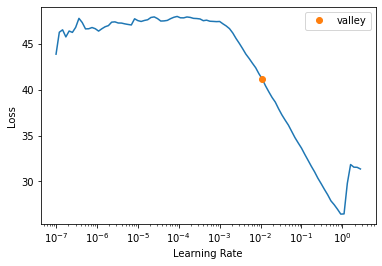

<Figure size 720x720 with 0 Axes>

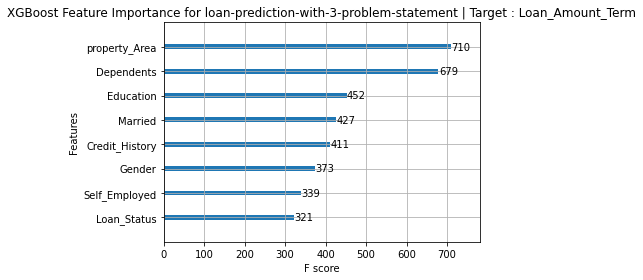

Target Variable: LoanAmount
CATS=====================
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status']
CONTS=====================
['Loan_ID', 'ApplicantIncome', 'CoapplicantIncome']
12
Could not convert Loan_ID to float.
Looping through continuous variables to find breakpoint
Error with  Loan_ID
Continuous variables that made the cut : ['ApplicantIncome', 'CoapplicantIncome']
Categorical variables that made the cut : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status']
Tabular Object size: 614


 14%|█▍        | 6/42 [00:00<00:00, 56.98it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.3401614966235347, 'Adjusted R-Squared': -0.44785304545935434, 'RMSE': 80.99663264641897, 'Time taken': 0.03476381301879883}
{'Model': 'BaggingRegressor', 'R-Squared': -0.3257698645993805, 'Adjusted R-Squared': -0.4323049430046877, 'RMSE': 80.56055829425082, 'Time taken': 0.03257155418395996}
{'Model': 'BayesianRidge', 'R-Squared': 0.046294612046526185, 'Adjusted R-Squared': -0.030342428056877813, 'RMSE': 68.32749732437394, 'Time taken': 0.010106801986694336}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.5374614922847187, 'Adjusted R-Squared': -0.6610075050575979, 'RMSE': 86.75420199316677, 'Time taken': 0.009776830673217773}
{'Model': 'DummyRegressor', 'R-Squared': -0.0011630448413355587, 'Adjusted R-Squared': -0.08161364665894277, 'RMSE': 70.00689, 'Time taken': 0.008486509323120117}
{'Model': 'ElasticNet', 'R-Squared': 0.053484031530934395, 'Adjusted R-Squared': -0.02257528736390113, 'RMSE': 68.06946987940863, 'Time taken': 0.009227

 29%|██▊       | 12/42 [00:00<00:01, 27.41it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.6059999574063066, 'Adjusted R-Squared': -0.7350535254121704, 'RMSE': 88.66682561467938, 'Time taken': 0.16623330116271973}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.7438225404575358, 'Adjusted R-Squared': -0.8839511374585878, 'RMSE': 92.3931000660579, 'Time taken': 0.03811836242675781}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.05368882036798939, 'Adjusted R-Squared': -0.022354042281011344, 'RMSE': 68.06210570271678, 'Time taken': 0.0156400203704834}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.12726340741892384, 'Adjusted R-Squared': -0.21784707408651593, 'RMSE': 74.28499533869382, 'Time taken': 0.12354850769042969}


 45%|████▌     | 19/42 [00:00<00:01, 18.60it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.013171370204277277, 'Adjusted R-Squared': -0.09458692673854951, 'RMSE': 70.42548561479381, 'Time taken': 0.25872325897216797}
{'Model': 'HuberRegressor', 'R-Squared': 0.038395666216980096, 'Adjusted R-Squared': -0.03887611060486962, 'RMSE': 68.60987083299639, 'Time taken': 0.0155487060546875}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.06192838401088219, 'Adjusted R-Squared': -0.1472619148688994, 'RMSE': 72.10012, 'Time taken': 0.01335287094116211}
{'Model': 'KernelRidge', 'R-Squared': -3.9620636009388077, 'Adjusted R-Squared': -4.360800854585676, 'RMSE': 155.85457635906496, 'Time taken': 0.0371701717376709}
{'Model': 'Lars', 'R-Squared': 0.02520167064798673, 'Adjusted R-Squared': -0.05313033796065714, 'RMSE': 69.0789589338479, 'Time taken': 0.02507925033569336}
{'Model': 'LarsCV', 'R-Squared': 0.03416176646520941, 'Adjusted R-Squared': -0.04345023444383611, 'RMSE': 68.76074799541536, 'Time taken': 0.045395851135253906}
{'

 52%|█████▏    | 22/42 [00:01<00:00, 20.36it/s]

{'Model': 'LassoCV', 'R-Squared': 0.03432046647471654, 'Adjusted R-Squared': -0.04327878175499378, 'RMSE': 68.75509861269336, 'Time taken': 0.08371305465698242}
{'Model': 'LassoLars', 'R-Squared': -0.0011630816223910934, 'Adjusted R-Squared': -0.08161368639561895, 'RMSE': 70.00689387584235, 'Time taken': 0.01048731803894043}
{'Model': 'LassoLarsCV', 'R-Squared': 0.03416176646520941, 'Adjusted R-Squared': -0.04345023444383611, 'RMSE': 68.76074799541536, 'Time taken': 0.024863481521606445}
{'Model': 'LassoLarsIC', 'R-Squared': 0.04424772326262438, 'Adjusted R-Squared': -0.03255379897520028, 'RMSE': 68.40078191894797, 'Time taken': 0.012082338333129883}
{'Model': 'LinearRegression', 'R-Squared': 0.025201670647987173, 'Adjusted R-Squared': -0.05313033796065669, 'RMSE': 69.07895893384789, 'Time taken': 0.010066747665405273}
{'Model': 'LinearSVR', 'R-Squared': -0.08534770081773146, 'Adjusted R-Squared': -0.17256314106201343, 'RMSE': 72.89082085408197, 'Time taken': 0.010385513305664062}


 76%|███████▌  | 32/42 [00:01<00:00, 14.29it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.6293768719896127, 'Adjusted R-Squared': -0.7603089420602065, 'RMSE': 89.30981082948813, 'Time taken': 0.78804612159729}
{'Model': 'NuSVR', 'R-Squared': 0.012613845010998825, 'Adjusted R-Squared': -0.06672968530061718, 'RMSE': 69.5235455986053, 'Time taken': 0.036850690841674805}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.025101131819828537, 'Adjusted R-Squared': -0.053238955801792276, 'RMSE': 69.08252117759884, 'Time taken': 0.0140228271484375}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.018833800240925513, 'Adjusted R-Squared': -0.060009912239714414, 'RMSE': 69.30422081284051, 'Time taken': 0.021747112274169922}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.07471843883868445, 'Adjusted R-Squared': 0.00036545624536454824, 'RMSE': 67.30159388042404, 'Time taken': 0.014549732208251953}
{'Model': 'PoissonRegressor', 'R-Squared': 0.02090207021610513, 'Adjusted R-Squared': -0.05777544199867202, 'RMSE': 69.231136631038

100%|██████████| 42/42 [00:02<00:00, 17.15it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.21198809534455032, 'Adjusted R-Squared': -0.3093799958633088, 'RMSE': 77.02604033844686, 'Time taken': 0.19284772872924805}
{'Model': 'Ridge', 'R-Squared': 0.025474749118980844, 'Adjusted R-Squared': -0.05283531568395805, 'RMSE': 69.06928242064936, 'Time taken': 0.010543584823608398}
{'Model': 'RidgeCV', 'R-Squared': 0.027827411568296934, 'Adjusted R-Squared': -0.0502936000021077, 'RMSE': 68.985859800796, 'Time taken': 0.011263370513916016}
{'Model': 'SGDRegressor', 'R-Squared': 0.02161028012235433, 'Adjusted R-Squared': -0.05701032236781356, 'RMSE': 69.2060936579429, 'Time taken': 0.010754823684692383}
{'Model': 'SVR', 'R-Squared': -0.024664597538585076, 'Adjusted R-Squared': -0.10700371698364997, 'RMSE': 70.82380597880469, 'Time taken': 0.025504589080810547}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.025201670647987173, 'Adjusted R-Squared': -0.05313033796065669, 'RMSE': 69.07895893384789, 'Time taken': 0.0100636482238769

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,26931.955078,23608.519531,153.650635,00:00
1,25849.279297,19987.064453,141.375610,00:00
2,22345.273438,6628.679199,81.416702,00:00
3,18424.222656,6748.214355,82.147514,00:00


Better model found at epoch 0 with _rmse value: 153.650634765625.
Better model found at epoch 1 with _rmse value: 141.3756103515625.
Better model found at epoch 2 with _rmse value: 81.41670227050781.
No improvement since epoch 2: early stopping


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,LoanAmount,LoanAmount_pred
0,3.00,3.00,5.00,2.00,2.00,10.00,2.00,2.00,2.00,124.00,97.59
1,3.00,2.00,2.00,2.00,2.00,10.00,1.00,1.00,1.00,209.00,84.98
2,3.00,3.00,3.00,2.00,2.00,8.00,2.00,3.00,2.00,50.00,103.28
3,3.00,2.00,2.00,2.00,2.00,10.00,2.00,3.00,2.00,136.00,103.42
4,3.00,2.00,2.00,2.00,3.00,10.00,2.00,1.00,2.00,141.00,94.82
5,2.00,2.00,3.00,2.00,3.00,10.00,2.00,2.00,2.00,150.00,93.44
6,3.00,1.00,1.00,2.00,2.00,10.00,2.00,3.00,2.00,160.00,105.20
7,3.00,3.00,4.00,2.00,2.00,10.00,2.00,2.00,2.00,90.00,104.31
8,3.00,3.00,5.00,3.00,3.00,10.00,1.00,2.00,2.00,130.00,87.51


<Figure size 432x288 with 0 Axes>

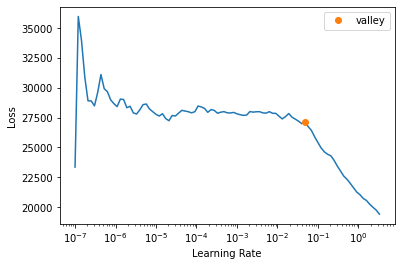

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.00     106.79
1  130.00     157.06
2  191.00     118.70
3  130.00     142.36
4  138.00     106.63
XGBoost RMSE:  91.00975


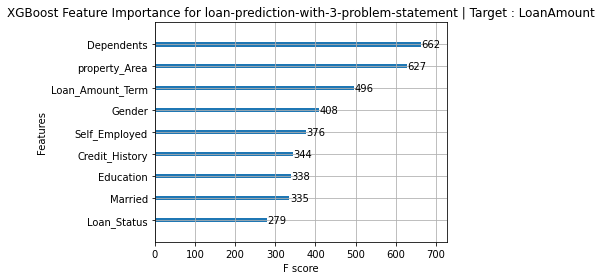

Target Variable: CoapplicantIncome
CATS=====================
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status']
CONTS=====================
['Loan_ID', 'ApplicantIncome', 'LoanAmount']
12
Could not convert Loan_ID to float.
Looping through continuous variables to find breakpoint
Error with  Loan_ID
Continuous variables that made the cut : ['ApplicantIncome', 'LoanAmount']
Categorical variables that made the cut : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status']
Tabular Object size: 614


 14%|█▍        | 6/42 [00:00<00:00, 59.94it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.02125175053012729, 'Adjusted R-Squared': -0.10331662334058378, 'RMSE': 1981.4315291159808, 'Time taken': 0.026195764541625977}
{'Model': 'BaggingRegressor', 'R-Squared': -0.48927125871931154, 'Adjusted R-Squared': -0.608944842009256, 'RMSE': 2392.762349819615, 'Time taken': 0.032195091247558594}
{'Model': 'BayesianRidge', 'R-Squared': 0.0039106492330055476, 'Adjusted R-Squared': -0.07613224502505633, 'RMSE': 1956.869259164194, 'Time taken': 0.012353181838989258}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -1.101920893066405, 'Adjusted R-Squared': -1.2708252505449553, 'RMSE': 2842.6333433653604, 'Time taken': 0.010475397109985352}
{'Model': 'DummyRegressor', 'R-Squared': -0.001087660305438165, 'Adjusted R-Squared': -0.08153220443712517, 'RMSE': 1961.773, 'Time taken': 0.008740901947021484}
{'Model': 'ElasticNet', 'R-Squared': -0.007085749121720664, 'Adjusted R-Squared': -0.08801228253328741, 'RMSE': 1967.641109434346, 'Time taken': 0.00

 29%|██▊       | 12/42 [00:00<00:01, 26.68it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -0.7347045909499181, 'Adjusted R-Squared': -0.8741004955798222, 'RMSE': 2582.4113765128386, 'Time taken': 0.15837812423706055}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.6490289314371205, 'Adjusted R-Squared': -0.7815401848561747, 'RMSE': 2517.8322962980897, 'Time taken': 0.04063010215759277}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.00064317312121831, 'Adjusted R-Squared': -0.07966228618154081, 'RMSE': 1960.0761946415907, 'Time taken': 0.029753684997558594}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.16936373020576645, 'Adjusted R-Squared': -0.26333045852587267, 'RMSE': 2120.251953475378, 'Time taken': 0.11165785789489746}


 38%|███▊      | 16/42 [00:00<00:01, 17.15it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.13576101420278208, 'Adjusted R-Squared': -0.2270275242726485, 'RMSE': 2089.5662300376152, 'Time taken': 0.23387956619262695}
{'Model': 'HuberRegressor', 'R-Squared': -0.07863685920552066, 'Adjusted R-Squared': -0.16531303539167852, 'RMSE': 2036.339993360079, 'Time taken': 0.017043113708496094}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.24514920245843141, 'Adjusted R-Squared': -0.3452058347988409, 'RMSE': 2187.8792, 'Time taken': 0.01313161849975586}
{'Model': 'KernelRidge', 'R-Squared': -0.7203217276170093, 'Adjusted R-Squared': -0.8585618664433761, 'RMSE': 2571.683388512023, 'Time taken': 0.05952906608581543}
{'Model': 'Lars', 'R-Squared': -0.03579311539325336, 'Adjusted R-Squared': -0.11902649073735394, 'RMSE': 1995.4882385272422, 'Time taken': 0.04555463790893555}


 52%|█████▏    | 22/42 [00:01<00:01, 17.53it/s]

{'Model': 'LarsCV', 'R-Squared': -0.0010876887623891829, 'Adjusted R-Squared': -0.08153223518079544, 'RMSE': 1961.7728626231014, 'Time taken': 0.08408451080322266}
{'Model': 'Lasso', 'R-Squared': -0.035327271482471945, 'Adjusted R-Squared': -0.11852321294088486, 'RMSE': 1995.039456538797, 'Time taken': 0.016761064529418945}
{'Model': 'LassoCV', 'R-Squared': -0.0010876887623891829, 'Adjusted R-Squared': -0.08153223518079544, 'RMSE': 1961.7728626231014, 'Time taken': 0.11586427688598633}
{'Model': 'LassoLars', 'R-Squared': -0.02635460894117525, 'Adjusted R-Squared': -0.10882953287394814, 'RMSE': 1986.375640940593, 'Time taken': 0.012313604354858398}
{'Model': 'LassoLarsCV', 'R-Squared': -0.0010876887623891829, 'Adjusted R-Squared': -0.08153223518079544, 'RMSE': 1961.7728626231014, 'Time taken': 0.024294137954711914}
{'Model': 'LassoLarsIC', 'R-Squared': -0.0010876887623891829, 'Adjusted R-Squared': -0.08153223518079544, 'RMSE': 1961.7728626231014, 'Time taken': 0.013013124465942383}
{'Mo

 76%|███████▌  | 32/42 [00:02<00:00, 14.21it/s]

{'Model': 'MLPRegressor', 'R-Squared': -0.6340725680220671, 'Adjusted R-Squared': -0.7653819708095546, 'RMSE': 2506.388169904987, 'Time taken': 0.7240214347839355}
{'Model': 'NuSVR', 'R-Squared': -0.07701101820118561, 'Adjusted R-Squared': -0.16355654644949502, 'RMSE': 2034.8047159584025, 'Time taken': 0.039281606674194336}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.03550320227305637, 'Adjusted R-Squared': -0.11871328102714118, 'RMSE': 1995.2089555798666, 'Time taken': 0.01392674446105957}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': -0.03550320227305637, 'Adjusted R-Squared': -0.11871328102714118, 'RMSE': 1995.2089555798666, 'Time taken': 0.021437883377075195}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.10459645402134021, 'Adjusted R-Squared': -0.19335866907662647, 'RMSE': 2060.6986411020785, 'Time taken': 0.016206026077270508}
{'Model': 'PoissonRegressor', 'R-Squared': -0.052625168926343946, 'Adjusted R-Squared': -0.13721112000078217, 'RMSE': 2011.636

100%|██████████| 42/42 [00:02<00:00, 16.87it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -0.44700384824167916, 'Adjusted R-Squared': -0.563280943189671, 'RMSE': 2358.5631311413777, 'Time taken': 0.18633294105529785}
{'Model': 'Ridge', 'R-Squared': -0.03555835401213292, 'Adjusted R-Squared': -0.11877286460239356, 'RMSE': 1995.262088094727, 'Time taken': 0.011824369430541992}
{'Model': 'RidgeCV', 'R-Squared': -0.03352426203783532, 'Adjusted R-Squared': -0.11657531880873284, 'RMSE': 1993.3015314826132, 'Time taken': 0.010157108306884766}
{'Model': 'SGDRegressor', 'R-Squared': -0.03903766575223022, 'Adjusted R-Squared': -0.12253176389303433, 'RMSE': 1998.6111593638218, 'Time taken': 0.010305643081665039}
{'Model': 'SVR', 'R-Squared': -0.10828312343436641, 'Adjusted R-Squared': -0.19734158871034224, 'RMSE': 2064.1346408286868, 'Time taken': 0.025196313858032227}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.03579311539325336, 'Adjusted R-Squared': -0.11902649073735394, 'RMSE': 1995.4882385272422, 'Time taken': 0.00962567

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,13051700.000000,6627176.000000,2574.330322,00:00
1,11022592.000000,6590410.500000,2567.179443,00:00
2,11676618.000000,6392488.000000,2528.336914,00:00
3,11935309.000000,5542222.500000,2354.192383,00:00
4,11751543.000000,3862568.750000,1965.341797,00:00
5,11496409.000000,9017619.000000,3002.935059,00:00


Better model found at epoch 0 with _rmse value: 2574.330322265625.
Better model found at epoch 1 with _rmse value: 2567.179443359375.
Better model found at epoch 2 with _rmse value: 2528.3369140625.
Better model found at epoch 3 with _rmse value: 2354.1923828125.
Better model found at epoch 4 with _rmse value: 1965.341796875.
No improvement since epoch 4: early stopping


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,CoapplicantIncome,CoapplicantIncome_pred
0,3.00,3.00,3.00,3.00,2.00,10.00,2.00,1.00,2.00,2436.00,2052.57
1,1.00,3.00,3.00,2.00,3.00,7.00,2.00,3.00,2.00,1833.00,1344.58
2,3.00,3.00,2.00,3.00,2.00,10.00,2.00,3.00,1.00,0.00,1831.22
3,2.00,2.00,2.00,2.00,1.00,10.00,2.00,1.00,1.00,0.00,1746.54
4,3.00,3.00,3.00,2.00,1.00,10.00,1.00,3.00,1.00,3369.00,1821.34
5,2.00,3.00,3.00,2.00,2.00,5.00,2.00,2.00,2.00,913.00,1328.21
6,1.00,3.00,4.00,3.00,2.00,10.00,1.00,1.00,1.00,1917.00,1993.36
7,3.00,3.00,4.00,2.00,1.00,10.00,2.00,1.00,2.00,2330.00,1696.86
8,3.00,3.00,5.00,2.00,2.00,10.00,2.00,3.00,2.00,0.00,1897.74


<Figure size 432x288 with 0 Axes>

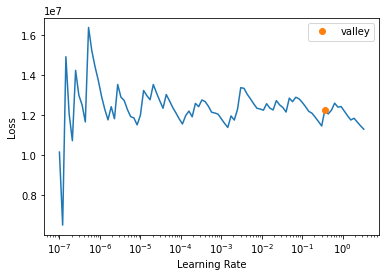

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.00    3431.97
1    0.00    3681.45
2    0.00    1023.30
3 1041.00    2724.08
4    0.00    2689.55
XGBoost RMSE:  2289.6292


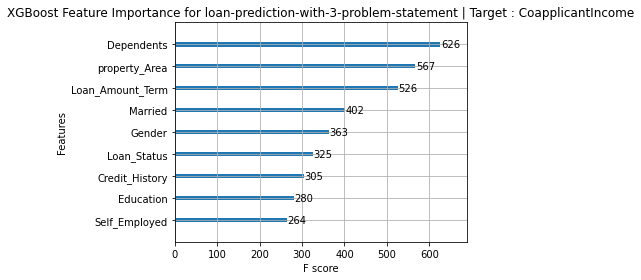

Target Variable: ApplicantIncome
CATS=====================
['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status']
CONTS=====================
['Loan_ID', 'CoapplicantIncome', 'LoanAmount']
12
Could not convert Loan_ID to float.
Looping through continuous variables to find breakpoint
Error with  Loan_ID
Continuous variables that made the cut : ['CoapplicantIncome', 'LoanAmount']
Categorical variables that made the cut : ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'property_Area', 'Loan_Status']
Tabular Object size: 614


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.8083913689574667, 'Adjusted R-Squared': -0.9537085325344059, 'RMSE': 4611.237376536592, 'Time taken': 0.025848388671875}


 14%|█▍        | 6/42 [00:00<00:00, 57.40it/s]

{'Model': 'BaggingRegressor', 'R-Squared': -0.5315155011136625, 'Adjusted R-Squared': -0.6545837110245818, 'RMSE': 4243.575808703472, 'Time taken': 0.0352933406829834}
{'Model': 'BayesianRidge', 'R-Squared': 0.01954597289274984, 'Adjusted R-Squared': -0.0592405114283685, 'RMSE': 3395.3526186693093, 'Time taken': 0.012411832809448242}
{'Model': 'DecisionTreeRegressor', 'R-Squared': -3.1424668174518375, 'Adjusted R-Squared': -3.475343615282789, 'RMSE': 6979.121927848508, 'Time taken': 0.010873794555664062}
{'Model': 'DummyRegressor', 'R-Squared': -0.02770835103650593, 'Adjusted R-Squared': -0.1102920578162252, 'RMSE': 3476.212, 'Time taken': 0.010011672973632812}
{'Model': 'ElasticNet', 'R-Squared': 0.018670069102984077, 'Adjusted R-Squared': -0.06018680034409751, 'RMSE': 3396.868925514337, 'Time taken': 0.00963139533996582}
{'Model': 'ElasticNetCV', 'R-Squared': 0.01943031463877465, 'Adjusted R-Squared': -0.05936546364918094, 'RMSE': 3395.552877408731, 'Time taken': 0.06084012985229492}

 29%|██▊       | 12/42 [00:00<00:01, 27.35it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': -1.966382230474463, 'Adjusted R-Squared': -2.204752231137589, 'RMSE': 5905.882768727459, 'Time taken': 0.167189359664917}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution
{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.44054393080195986, 'Adjusted R-Squared': -0.556301925241403, 'RMSE': 4115.612902533615, 'Time taken': 0.03817152976989746}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.018775652177910107, 'Adjusted R-Squared': -0.06007273291493642, 'RMSE': 3396.686182940966, 'Time taken': 0.015601873397827148}
{'Model': 'GradientBoostingRegressor', 'R-Squared': -0.38445279905440555, 'Adjusted R-Squared': -0.4957034704069916, 'RMSE': 4034.6915931173157, 'Time taken': 0.09650897979736328}


 45%|████▌     | 19/42 [00:00<00:01, 19.12it/s]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': -0.018618474866253232, 'Adjusted R-Squared': -0.10047174516800572, 'RMSE': 3460.804293957051, 'Time taken': 0.23333501815795898}
{'Model': 'HuberRegressor', 'R-Squared': 0.029412511707719746, 'Adjusted R-Squared': -0.04858112574433848, 'RMSE': 3378.2253058281517, 'Time taken': 0.016275405883789062}
{'Model': 'KNeighborsRegressor', 'R-Squared': -0.38190674344424913, 'Adjusted R-Squared': -0.49295282104244764, 'RMSE': 4030.98, 'Time taken': 0.012876033782958984}
{'Model': 'KernelRidge', 'R-Squared': -2.109394469299515, 'Adjusted R-Squared': -2.3592565248682256, 'RMSE': 6046.571286973498, 'Time taken': 0.03515791893005371}
{'Model': 'Lars', 'R-Squared': -0.0014173471482152866, 'Adjusted R-Squared': -0.08188838397262543, 'RMSE': 3431.4590590664034, 'Time taken': 0.02852344512939453}
{'Model': 'LarsCV', 'R-Squared': 0.039980848615767006, 'Adjusted R-Squared': -0.03716354747760886, 'RMSE': 3359.7828969027173, 'Time taken': 0.06406497955

 52%|█████▏    | 22/42 [00:01<00:00, 20.73it/s]

{'Model': 'LassoCV', 'R-Squared': 0.04176707117025491, 'Adjusted R-Squared': -0.03523378918213527, 'RMSE': 3356.6558165152924, 'Time taken': 0.0686652660369873}
{'Model': 'LassoLars', 'R-Squared': 0.008403104693422203, 'Adjusted R-Squared': -0.07127878867942772, 'RMSE': 3414.592213989943, 'Time taken': 0.011908769607543945}
{'Model': 'LassoLarsCV', 'R-Squared': 0.039980848615767006, 'Adjusted R-Squared': -0.03716354747760886, 'RMSE': 3359.7828969027173, 'Time taken': 0.026220321655273438}
{'Model': 'LassoLarsIC', 'R-Squared': 0.04178224724581048, 'Adjusted R-Squared': -0.03521739360050824, 'RMSE': 3356.6292357840057, 'Time taken': 0.014297246932983398}
{'Model': 'LinearRegression', 'R-Squared': -0.0014173471482148425, 'Adjusted R-Squared': -0.08188838397262499, 'RMSE': 3431.4590590664025, 'Time taken': 0.011583089828491211}
{'Model': 'LinearSVR', 'R-Squared': -1.6801093957814448, 'Adjusted R-Squared': -1.895475329371025, 'RMSE': 5613.678378194171, 'Time taken': 0.011494159698486328}


 76%|███████▌  | 32/42 [00:02<00:00, 13.59it/s]

{'Model': 'MLPRegressor', 'R-Squared': -1.9708337657224644, 'Adjusted R-Squared': -2.209561479039448, 'RMSE': 5910.312472568444, 'Time taken': 0.8624618053436279}
{'Model': 'NuSVR', 'R-Squared': -0.033087137894865615, 'Adjusted R-Squared': -0.11610306861856001, 'RMSE': 3485.296609580171, 'Time taken': 0.03526139259338379}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': -0.0780876459850095, 'Adjusted R-Squared': -0.16471968896594769, 'RMSE': 3560.3959737798587, 'Time taken': 0.013808488845825195}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.0023566385531774703, 'Adjusted R-Squared': -0.07781113156308495, 'RMSE': 3424.9869813891114, 'Time taken': 0.021067142486572266}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.0019339462445928657, 'Adjusted R-Squared': -0.08244649549639038, 'RMSE': 3432.3440347934866, 'Time taken': 0.017786502838134766}
{'Model': 'PoissonRegressor', 'R-Squared': -0.006262674792345546, 'Adjusted R-Squared': -0.08712306830244465, 'RMSE': 3439.75

100%|██████████| 42/42 [00:02<00:00, 16.82it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': -1.2255032281534923, 'Adjusted R-Squared': -1.404338308987255, 'RMSE': 5115.468100941772, 'Time taken': 0.1956956386566162}
{'Model': 'Ridge', 'R-Squared': -0.0012223882552657717, 'Adjusted R-Squared': -0.08167775874006389, 'RMSE': 3431.125019504956, 'Time taken': 0.010354757308959961}
{'Model': 'RidgeCV', 'R-Squared': 0.00045988423422893554, 'Adjusted R-Squared': -0.07986030363980623, 'RMSE': 3428.2412876152052, 'Time taken': 0.01018667221069336}
{'Model': 'SGDRegressor', 'R-Squared': -0.002484152213623192, 'Adjusted R-Squared': -0.083040914445075, 'RMSE': 3433.2863309348063, 'Time taken': 0.011631250381469727}
{'Model': 'SVR', 'R-Squared': -0.12531289379988575, 'Adjusted R-Squared': -0.21573982276594794, 'RMSE': 3637.5411420210094, 'Time taken': 0.025129079818725586}
{'Model': 'TransformedTargetRegressor', 'R-Squared': -0.0014173471482148425, 'Adjusted R-Squared': -0.08188838397262499, 'RMSE': 3431.4590590664025, 'Time taken': 0.0095796

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,77141536.000000,36046992.000000,6003.914551,00:00
1,72374168.000000,35938504.000000,5994.873047,00:00
2,74184672.000000,35224068.000000,5934.987305,00:00
3,70270200.000000,31792668.000000,5638.498535,00:00
4,66118768.000000,21987828.000000,4689.118164,00:00
5,62879048.000000,16371336.000000,4046.150879,00:00
6,57564408.000000,11350414.000000,3369.037598,00:00
7,55368488.000000,16514216.000000,4063.768555,00:00


Better model found at epoch 0 with _rmse value: 6003.91455078125.
Better model found at epoch 1 with _rmse value: 5994.873046875.
Better model found at epoch 2 with _rmse value: 5934.9873046875.
Better model found at epoch 3 with _rmse value: 5638.49853515625.
Better model found at epoch 4 with _rmse value: 4689.1181640625.
Better model found at epoch 5 with _rmse value: 4046.15087890625.
Better model found at epoch 6 with _rmse value: 3369.03759765625.
No improvement since epoch 6: early stopping


,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,property_Area,Loan_Status,ApplicantIncome,ApplicantIncome_pred
0,3.00,3.00,2.00,2.00,2.00,10.00,2.00,2.00,2.00,3727.00,4740.90
1,3.00,3.00,5.00,2.00,2.00,10.00,2.00,1.00,2.00,15000.00,4740.90
2,3.00,3.00,2.00,2.00,3.00,10.00,2.00,2.00,2.00,9560.00,5108.85
3,2.00,1.00,1.00,2.00,2.00,8.00,2.00,2.00,2.00,10047.00,4971.25
4,3.00,3.00,5.00,3.00,2.00,1.00,1.00,2.00,1.00,4755.00,4854.31
5,3.00,3.00,4.00,2.00,2.00,10.00,2.00,1.00,2.00,3510.00,4740.90
6,3.00,3.00,4.00,3.00,2.00,10.00,2.00,2.00,2.00,3917.00,4168.37
7,3.00,3.00,3.00,2.00,1.00,10.00,1.00,2.00,1.00,3717.00,4901.16
8,3.00,3.00,5.00,2.00,2.00,10.00,2.00,2.00,2.00,5167.00,4740.90


<Figure size 432x288 with 0 Axes>

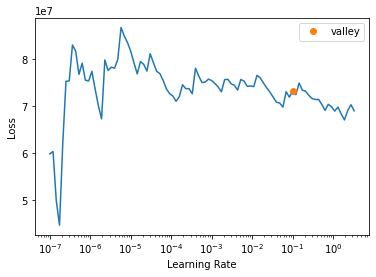

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0 4200.00    3343.42
1 4301.00    3719.61
2 3727.00    4658.11
3 4707.00    5922.50
4 3015.00    3899.04
XGBoost RMSE:  7242.7783


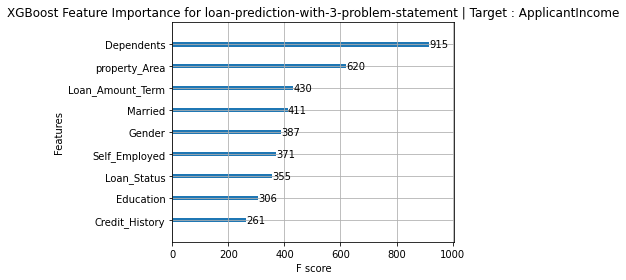

<Figure size 432x288 with 0 Axes>

In [15]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')


if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string():
            df[col + '_no_percent'] = df[col].str.replace('%', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

            feature  importance
0        Dependents         915
1     Self_Employed         371
2         Education         306
3  Loan_Amount_Term         430
4            Gender         387


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

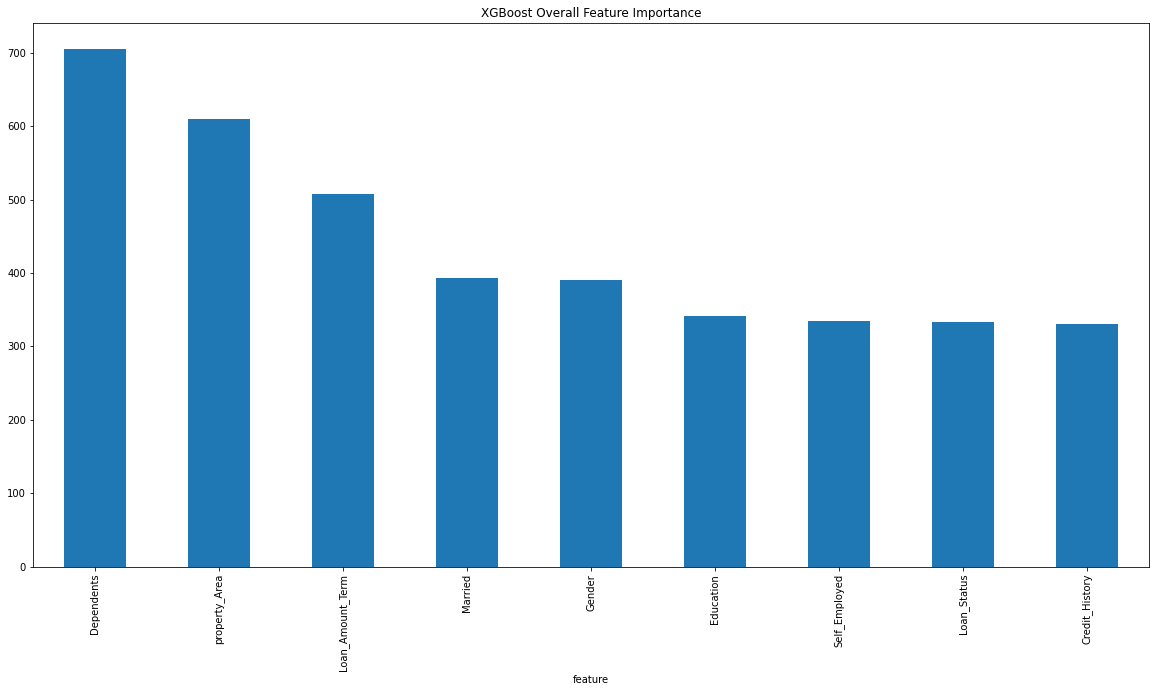

In [16]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [17]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
property_Area        0
Loan_Status          0
dtype: int64

# **To Be Continued...**